In [1]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

In [2]:
# Set global theme settings for plotting
plt.rcParams.update({
    'font.size': 20,          # Set font size
    'lines.linewidth': 3,     # Set default line thickness
    'axes.titlesize': 20,     # Title font size
    'axes.labelsize': 18,     # Axis label font size
    'xtick.labelsize': 14,    # X-tick label font size
    'ytick.labelsize': 14,    # Y-tick label font size
    'grid.color': 'gray',     # Grid color
    'grid.linestyle': '--',   # Grid line style
    'grid.linewidth': 0.5,    # Grid line width
    'legend.fontsize': 16     # Legend font size
})

In [3]:
human_Ud = 2.0
Kimetalsd = -0.009
mean_segregating = -human_Ud/Kimetalsd
stdv_segregating = np.sqrt(-human_Ud/Kimetalsd)
interval_span = 60

segregating_mutations = np.linspace(mean_segregating-interval_span, mean_segregating+interval_span, 100)
negative_epsilon = -0.001
positive_epsilon = 0.001

In [4]:
def get_growth_rate(Ud, sd, segregating_mutations, mean_segregating_mutations, epsilon):
  if epsilon == 0:
    growth_rate = -sd*(mean_segregating_mutations-segregating_mutations)
  else:
    epsilonoversd = epsilon/sd
    exponential_function = np.exp(mean_segregating_mutations*epsilonoversd)
    multiplicative_function = (1+epsilonoversd)**segregating_mutations
    growth_rate = -(sd**2)*(exponential_function-multiplicative_function)/(exponential_function*epsilon)
  return growth_rate

def get_fitness(growth_rate):
  fitness = np.exp(growth_rate)
  return fitness

In [5]:
mult_growthrates = get_growth_rate(human_Ud, Kimetalsd, segregating_mutations, mean_segregating, 0)
negative_epistasis_growthrates = get_growth_rate(human_Ud, Kimetalsd, segregating_mutations, mean_segregating, negative_epsilon)
positive_epistasis_growthrates = get_growth_rate(human_Ud, Kimetalsd, segregating_mutations, mean_segregating, positive_epsilon)


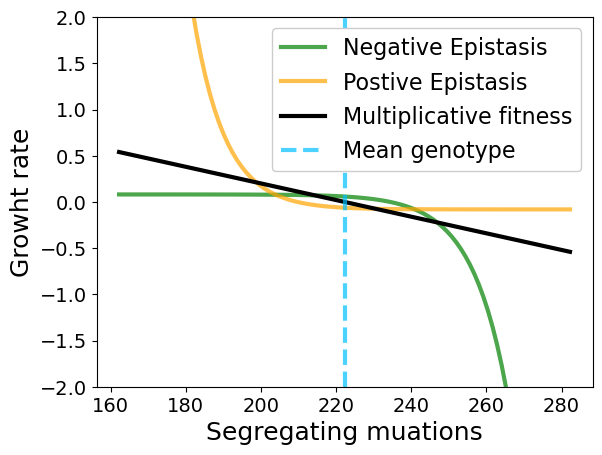

In [6]:
plt.plot(segregating_mutations, negative_epistasis_growthrates, label='Negative Epistasis', alpha=0.7, color='green')
plt.plot(segregating_mutations, positive_epistasis_growthrates, label='Postive Epistasis', alpha=0.7, color = 'orange')
plt.plot(segregating_mutations, mult_growthrates, label='Multiplicative fitness', color='black')
plt.xlabel('Segregating muations')
plt.ylabel('Growht rate')
plt.axvline(x=mean_segregating, color='deepskyblue', linestyle='--', label='Mean genotype', alpha=0.7)
plt.legend(framealpha=1)
plt.ylim(-2, 2)
plt.savefig('graphs/growth_rates_model.png', bbox_inches='tight') 

In [7]:
mult_fitness = get_fitness(mult_growthrates)
negative_epistasis_fitness = get_fitness(negative_epistasis_growthrates)
positive_epistasis_fitness = get_fitness(positive_epistasis_growthrates)

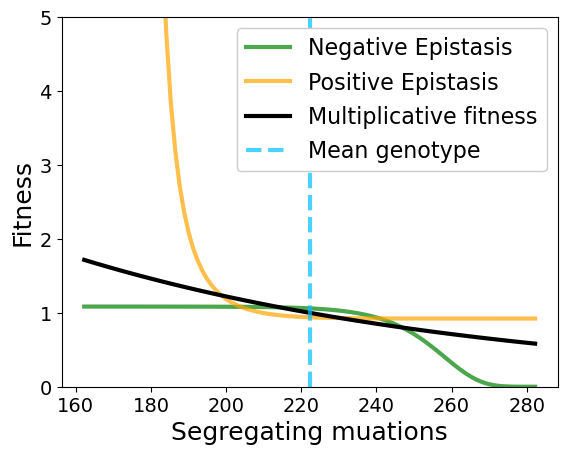

In [8]:
plt.plot(segregating_mutations, negative_epistasis_fitness, label='Negative Epistasis', alpha=0.7, color='green')
plt.plot(segregating_mutations, positive_epistasis_fitness, label='Positive Epistasis', alpha=0.7, color = 'orange')
plt.plot(segregating_mutations, mult_fitness, label='Multiplicative fitness', color='black')
plt.xlabel('Segregating muations')
plt.ylabel('Fitness')
plt.axvline(x=mean_segregating, color='deepskyblue', linestyle='--', label='Mean genotype', alpha=0.7)
plt.legend(framealpha=1)
plt.ylim(0, 5)
plt.savefig('graphs/fitnessmodel.png', bbox_inches='tight') 

In [15]:
positive_epsilon = 0.004
negative_epsilon = -0.004

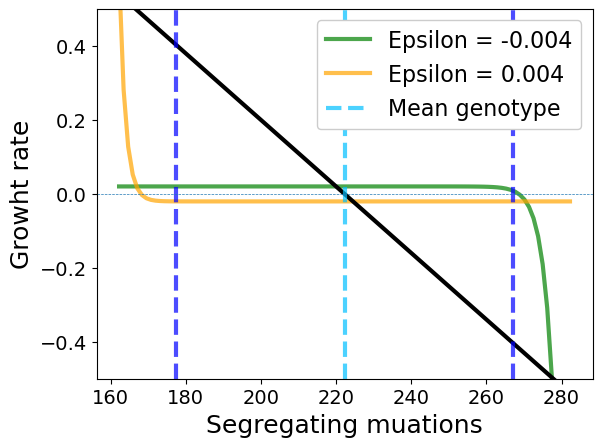

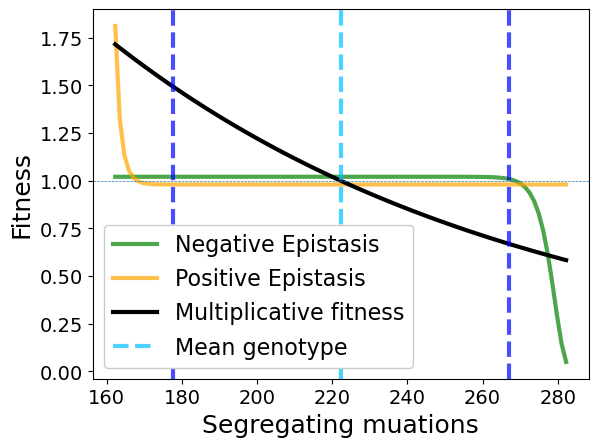

In [16]:
arbritrary_positive_epistasis_growthrates = get_growth_rate(human_Ud, Kimetalsd, segregating_mutations, mean_segregating, positive_epsilon)
arbritrary_negative_epistasis_growthrates = get_growth_rate(human_Ud, Kimetalsd, segregating_mutations, mean_segregating, negative_epsilon)

plt.plot(segregating_mutations, arbritrary_negative_epistasis_growthrates, label='Epsilon = ' + str(negative_epsilon), alpha=0.7, color='green')
plt.plot(segregating_mutations, arbritrary_positive_epistasis_growthrates, label='Epsilon = ' + str(positive_epsilon), alpha=0.7, color = 'orange')
plt.plot(segregating_mutations, mult_growthrates, color='black')
plt.xlabel('Segregating muations')
plt.ylabel('Growht rate')
plt.axvline(x=mean_segregating, color='deepskyblue', linestyle='--', label='Mean genotype', alpha=0.7)
plt.axvline(x=mean_segregating + 3*stdv_segregating, color='blue', linestyle='--', alpha=0.7)
plt.axvline(x=mean_segregating - 3*stdv_segregating, color='blue', linestyle='--', alpha=0.7)
plt.axhline(y = 0, linestyle = '--', linewidth=0.5) 
plt.legend(framealpha=1)
plt.ylim(-0.5, 0.5)
plt.show()
plt.close()

mult_fitness = get_fitness(mult_growthrates)
negative_epistasis_fitness = get_fitness(arbritrary_negative_epistasis_growthrates)
positive_epistasis_fitness = get_fitness(arbritrary_positive_epistasis_growthrates)

plt.plot(segregating_mutations, negative_epistasis_fitness, label='Negative Epistasis', alpha=0.7, color='green')
plt.plot(segregating_mutations, positive_epistasis_fitness, label='Positive Epistasis', alpha=0.7, color = 'orange')
plt.plot(segregating_mutations, mult_fitness, label='Multiplicative fitness', color='black')
plt.xlabel('Segregating muations')
plt.ylabel('Fitness')
plt.axvline(x=mean_segregating, color='deepskyblue', linestyle='--', label='Mean genotype', alpha=0.7)
plt.axvline(x=mean_segregating + 3*stdv_segregating, color='blue', linestyle='--', alpha=0.7)
plt.axvline(x=mean_segregating - 3*stdv_segregating, color='blue', linestyle='--', alpha=0.7)
plt.legend(framealpha=1)
#plt.ylim(0, 4)
plt.axhline(y = 1, linestyle = '--', linewidth=0.5) 
plt.show()
plt.close()


In [11]:
positive_epsilon = 0.0001
negative_epsilon = -0.0001

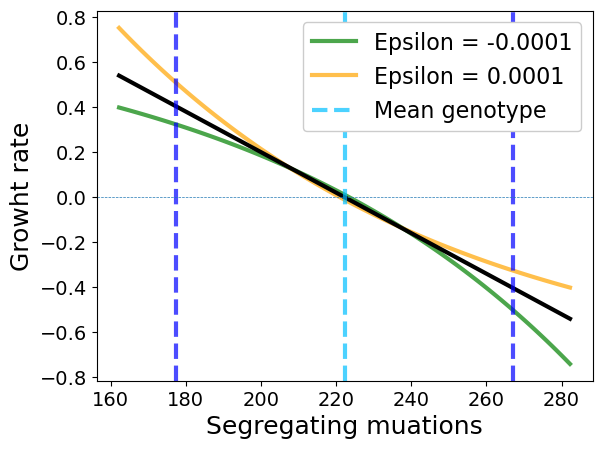

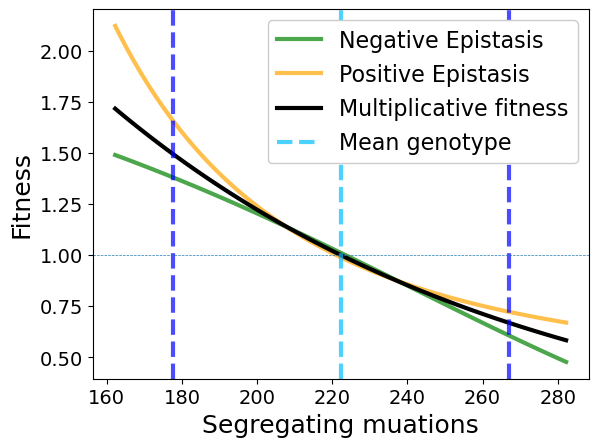

In [12]:
arbritrary_positive_epistasis_growthrates = get_growth_rate(human_Ud, Kimetalsd, segregating_mutations, mean_segregating, positive_epsilon)
arbritrary_negative_epistasis_growthrates = get_growth_rate(human_Ud, Kimetalsd, segregating_mutations, mean_segregating, negative_epsilon)

plt.plot(segregating_mutations, arbritrary_negative_epistasis_growthrates, label='Epsilon = ' + str(negative_epsilon), alpha=0.7, color='green')
plt.plot(segregating_mutations, arbritrary_positive_epistasis_growthrates, label='Epsilon = ' + str(positive_epsilon), alpha=0.7, color = 'orange')
plt.plot(segregating_mutations, mult_growthrates, color='black')
plt.xlabel('Segregating muations')
plt.ylabel('Growht rate')
plt.axvline(x=mean_segregating, color='deepskyblue', linestyle='--', label='Mean genotype', alpha=0.7)
plt.axvline(x=mean_segregating + 3*stdv_segregating, color='blue', linestyle='--', alpha=0.7)
plt.axvline(x=mean_segregating - 3*stdv_segregating, color='blue', linestyle='--', alpha=0.7)
plt.axhline(y = 0, linestyle = '--', linewidth=0.5) 
plt.legend(framealpha=1)
#plt.ylim(-0.5, 0.5)
plt.show()
plt.close()

mult_fitness = get_fitness(mult_growthrates)
negative_epistasis_fitness = get_fitness(arbritrary_negative_epistasis_growthrates)
positive_epistasis_fitness = get_fitness(arbritrary_positive_epistasis_growthrates)

plt.plot(segregating_mutations, negative_epistasis_fitness, label='Negative Epistasis', alpha=0.7, color='green')
plt.plot(segregating_mutations, positive_epistasis_fitness, label='Positive Epistasis', alpha=0.7, color = 'orange')
plt.plot(segregating_mutations, mult_fitness, label='Multiplicative fitness', color='black')
plt.xlabel('Segregating muations')
plt.ylabel('Fitness')
plt.axvline(x=mean_segregating, color='deepskyblue', linestyle='--', label='Mean genotype', alpha=0.7)
plt.axvline(x=mean_segregating + 3*stdv_segregating, color='blue', linestyle='--', alpha=0.7)
plt.axvline(x=mean_segregating - 3*stdv_segregating, color='blue', linestyle='--', alpha=0.7)
plt.legend(framealpha=1)
#plt.ylim(0, 4)
plt.axhline(y = 1, linestyle = '--', linewidth=0.5) 
plt.show()
plt.close()
